In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

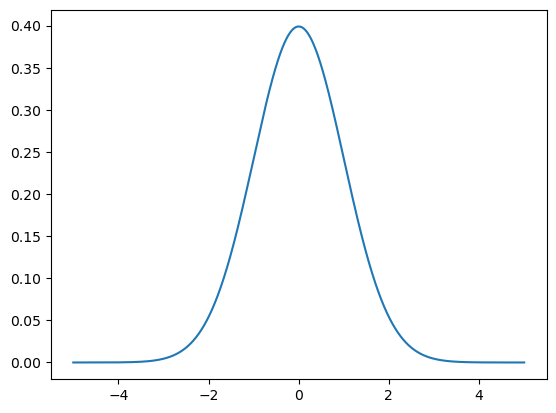

In [4]:
X = np.linspace(-5, 5, 1000)
Y = scipy.stats.norm.pdf(X)

plt.plot(X, Y)
plt.show()

In [26]:
class ParzenEstimator:
    
    def __init__(self, h, sample):
        self.h = h
        self.sample = sample
        self.N = len(sample)
        
    def __call__(self, x):
        u_arr = (self.sample - x) / self.h
        K = (np.abs(u_arr) <= 0.5).sum()            
        return K / (self.N * self.h)        

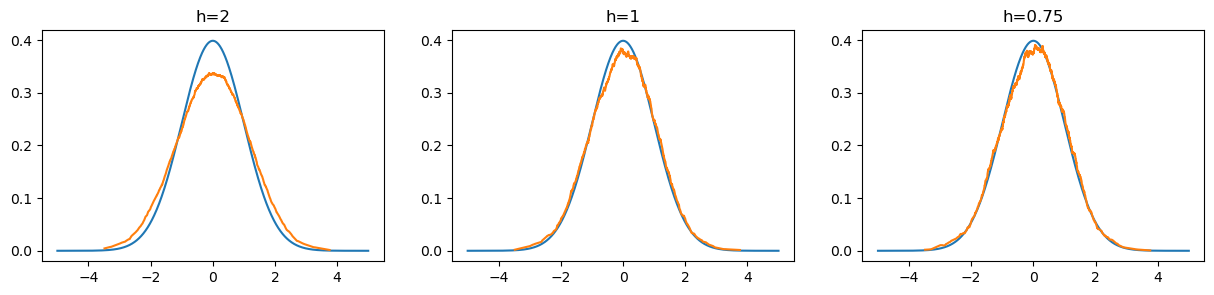

In [50]:
sample = np.random.normal(0, 1, 2000)
sample = np.sort(sample)

fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

est = np.vectorize(ParzenEstimator(h=2, sample=sample))
Y_pred = est(sample)
ax[0].plot(X, Y)
ax[0].plot(sample, Y_pred)
ax[0].title.set_text('h=2')

est = np.vectorize(ParzenEstimator(h=1, sample=sample))
Y_pred = est(sample)
ax[1].plot(X, Y)
ax[1].plot(sample, Y_pred)
ax[1].title.set_text('h=1')

est = np.vectorize(ParzenEstimator(h=0.75, sample=sample))
Y_pred = est(sample)
ax[2].plot(X, Y)
ax[2].plot(sample, Y_pred)
ax[2].title.set_text('h=0.75')

plt.show()